In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing Dataset
df = pd.read_csv(r"D:\Data Science\cab_rides.csv")
df1 = pd.read_csv(r"D:\Data Science\weather.csv")

In [3]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
df1.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [6]:
df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [7]:
# Get unique values in each column
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in distance: [0.44 1.08 1.11 0.72 2.48 3.24 2.94 1.76 0.71 1.23 1.16 2.67 3.39 2.82
 2.49 3.07 1.57 3.2  3.61 3.05 1.75 2.36 2.32 1.02 1.17 4.43 1.4  1.01
 2.84 1.3  1.81 2.44 3.04 2.59 3.25 2.66 3.26 2.39 3.28 2.81 3.18 2.63
 3.14 1.79 2.16 1.39 1.97 2.92 2.14 0.91 2.58 3.23 3.02 0.64 2.38 0.8
 2.07 2.61 3.45 1.35 2.8  1.03 3.35 2.93 1.07 3.17 1.2  7.46 1.58 1.71
 1.21 1.61 3.3  4.39 0.55 4.42 1.45 0.61 0.49 0.39 3.8  2.46 2.34 2.56
 4.23 1.56 2.35 3.37 1.52 2.05 2.15 1.26 1.5  4.76 1.34 3.41 1.33 2.19
 1.04 1.22 1.09 0.54 2.09 3.68 1.66 1.92 2.33 2.25 2.88 3.42 0.63 1.41
 4.51 0.56 3.47 4.09 2.73 3.19 0.65 2.78 1.   2.62 2.77 2.47 1.43 3.1
 1.89 2.3  4.31 1.06 1.64 1.86 4.1  1.74 2.31 2.83 3.48 1.78 4.44 0.52
 0.92 3.08 0.43 5.33 4.5  0.46 2.91 1.14 3.22 1.69 0.81 1.36 1.73 4.61
 2.68 2.03 4.73 2.27 1.25 3.43 2.72 3.15 0.59 0.53 3.44 2.17 2.96 0.76
 3.79 2.43 2.5  4.55 2.12 2.   5.32 0.42 1.47 2.86 3.12 2.85 1.49 4.35
 0.3  1.59 1.46 3.06 5.56 2.37 2.41 1.37 3.16 0.73 3

In [8]:
df['price'] = df['price'].fillna(df['price'].median())

In [9]:
df["fare_per_mile"] = round(df["price"]/df["distance"],2)

In [10]:
df["price"]=df["fare_per_mile"]*df['distance']

In [11]:
from datetime import datetime, date
df['date_time']= pd.to_datetime(df['time_stamp']/1000, unit='s')
df1['date_time']= pd.to_datetime(df1['time_stamp'], unit='s')

## EDA

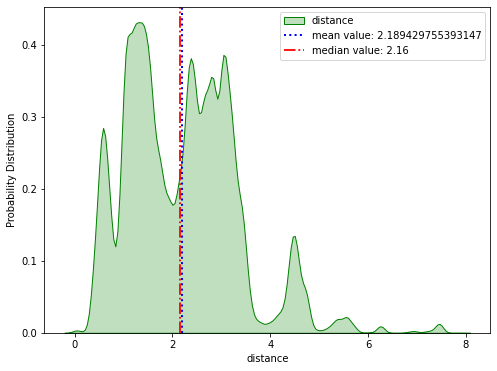

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=df["distance"], shade=True,color='g',label="distance")
plt.axvline(x=df["distance"].mean(),color="b",ls=":",lw=2,label="mean value: {}".format(df["distance"].mean()))
plt.axvline(x=df["distance"].median(),color="r",ls="-.",lw=1.8,label="median value: {}".format(df["distance"].median()))
plt.xlabel("distance")
plt.ylabel("Probability Distribution")
plt.legend()

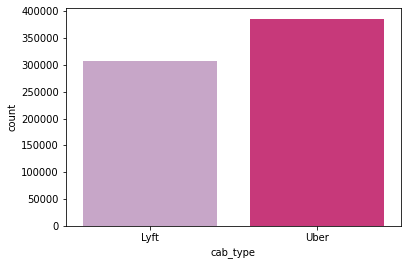

In [13]:
sns.countplot(x="cab_type",data=df,palette ='PuRd')
plt.show()

In [14]:
df= df.drop(["time_stamp"],axis=1)

In [15]:
df.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,fare_per_mile,date_time
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,11.36,2018-12-16 09:30:07.890000128
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,2018-11-27 02:00:23.676999936
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,15.91,2018-11-28 01:00:22.197999872
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,59.09,2018-11-30 04:53:02.749000192
4,0.44,Lyft,North Station,Haymarket Square,8.9980,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,20.45,2018-11-29 03:49:20.223000064


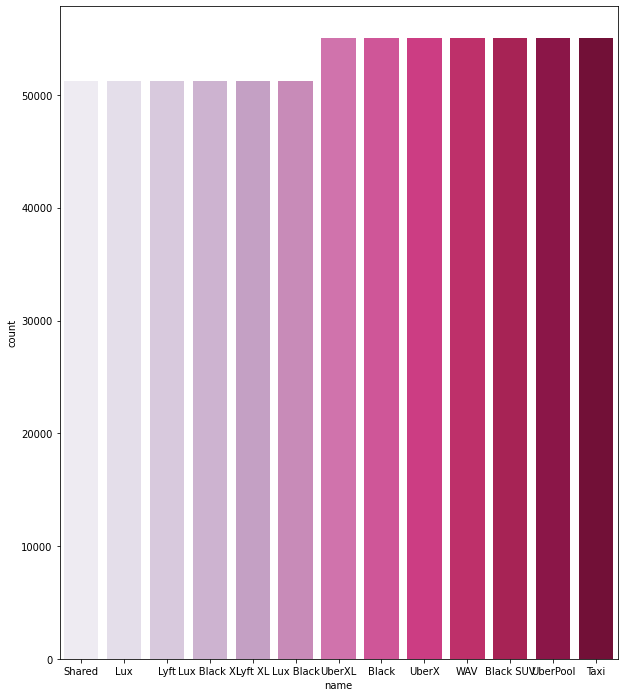

In [16]:
plt.figure(figsize=(10,12))
sns.countplot(x="name",data=df,palette ='PuRd')
plt.show()

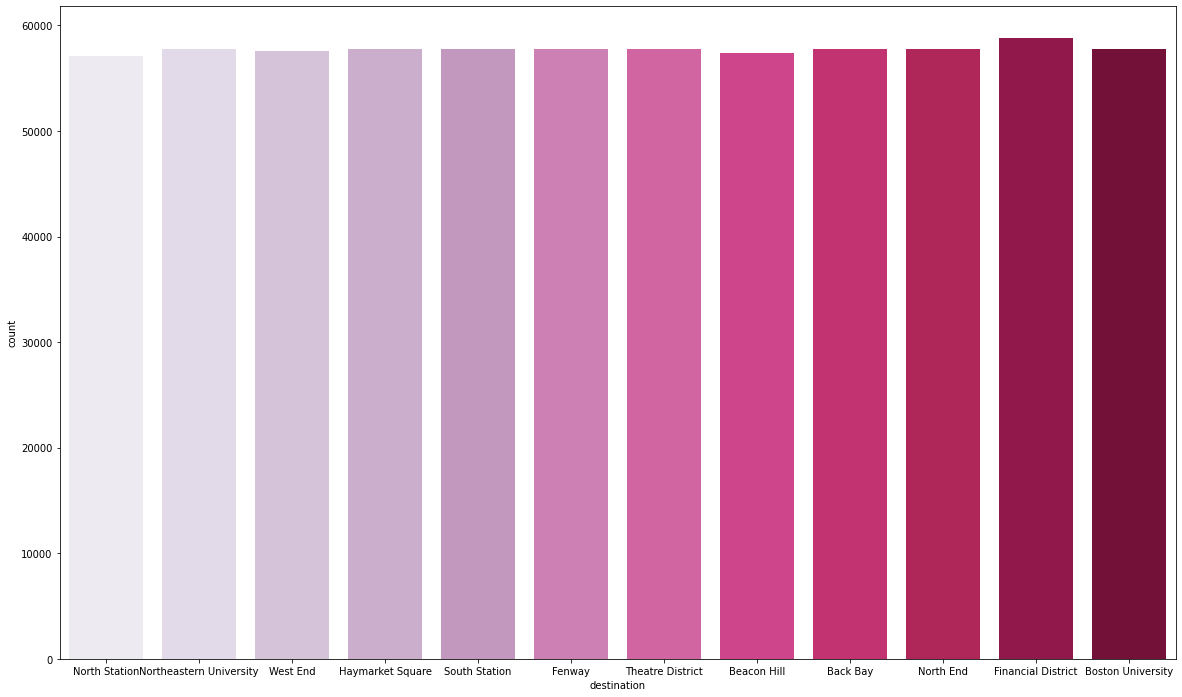

In [17]:
plt.figure(figsize=(20,12))
sns.countplot(x="destination",data=df,palette ='PuRd')
plt.show()

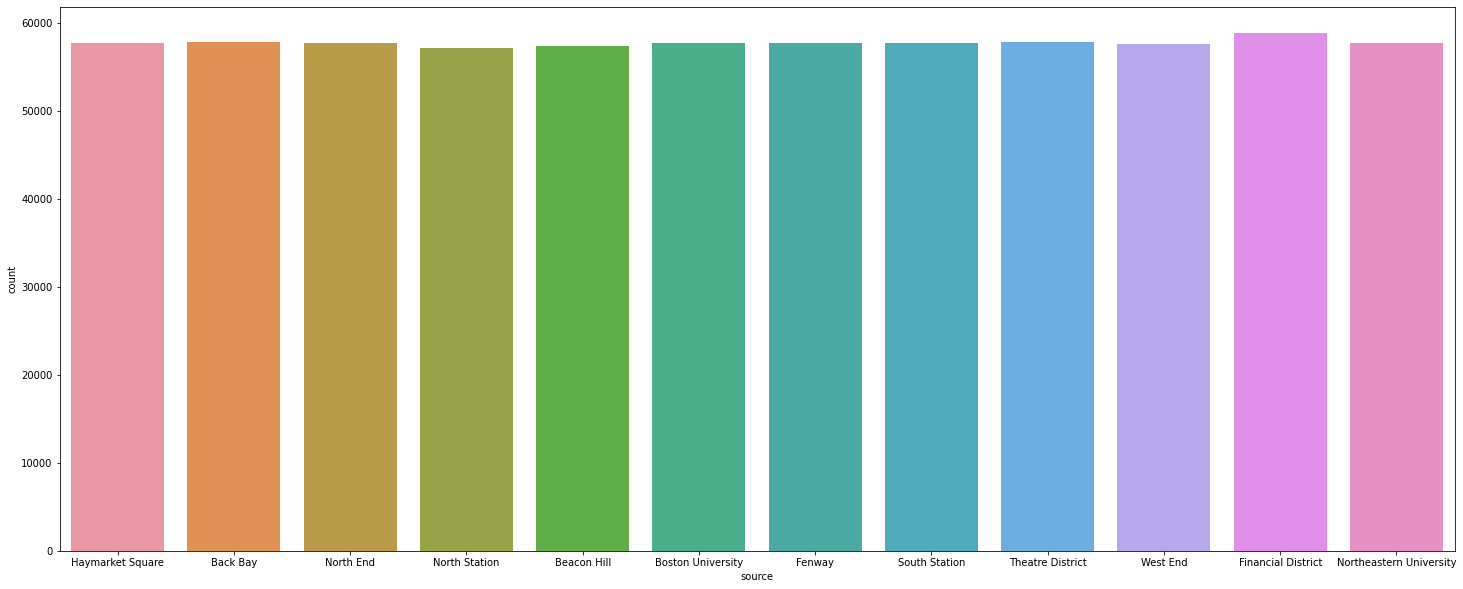

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(x="source",data=df)
plt.show()

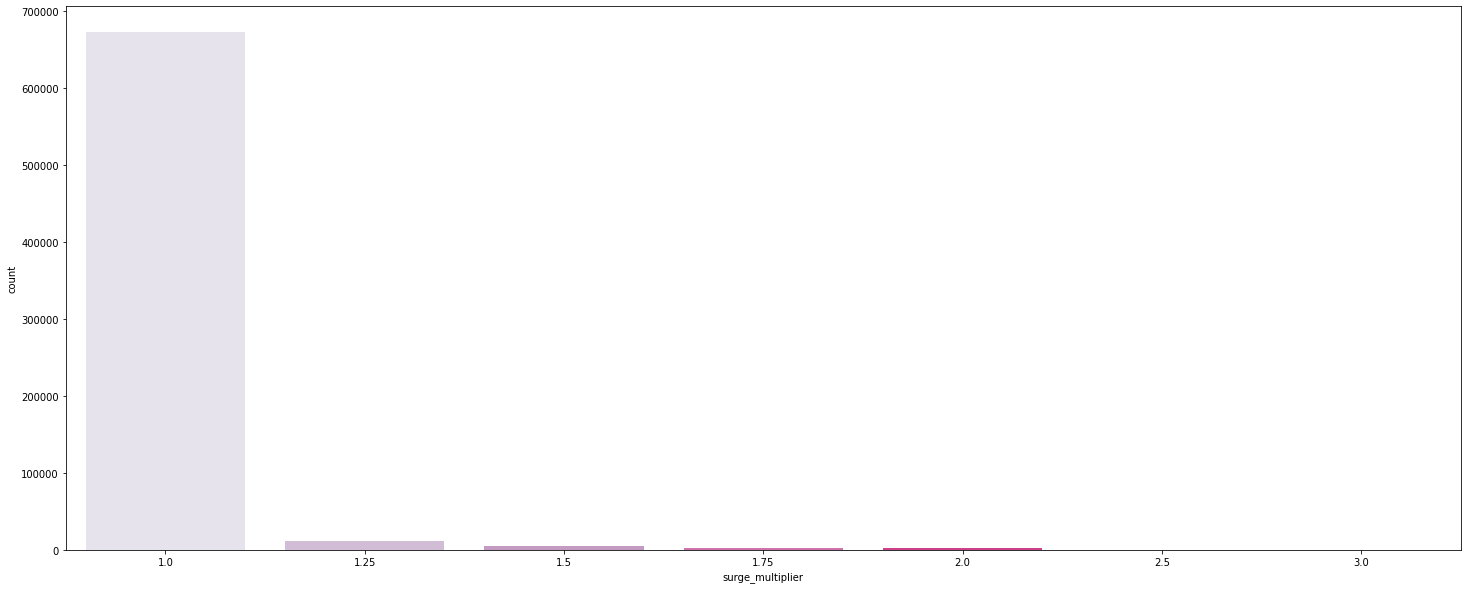

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(x="surge_multiplier",data=df,palette ='PuRd')
plt.show()

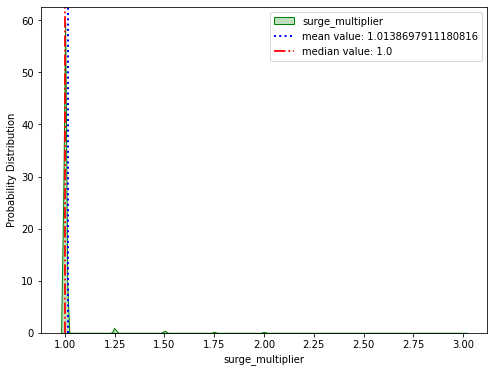

In [20]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=df["surge_multiplier"], shade=True,color='g',label="surge_multiplier")
plt.axvline(x=df["surge_multiplier"].mean(),color="b",ls=":",lw=2,label="mean value: {}".format(df["surge_multiplier"].mean()))
plt.axvline(x=df["surge_multiplier"].median(),color="r",ls="-.",lw=1.8,label="median value: {}".format(df["surge_multiplier"].median()))
plt.xlabel("surge_multiplier")
plt.ylabel("Probability Distribution")
plt.legend()

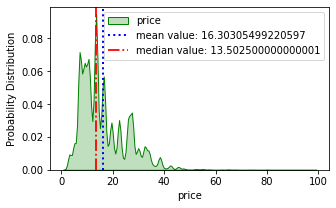

In [21]:
plt.figure(figsize=(5,3))
sns.kdeplot(x=df["price"], shade=True,color='g',label="price")
plt.axvline(x=df["price"].mean(),color="b",ls=":",lw=2,label="mean value: {}".format(df["price"].mean()))
plt.axvline(x=df["price"].median(),color="r",ls="-.",lw=1.8,label="median value: {}".format(df["price"].median()))
plt.xlabel("price")
plt.ylabel("Probability Distribution")
plt.legend()

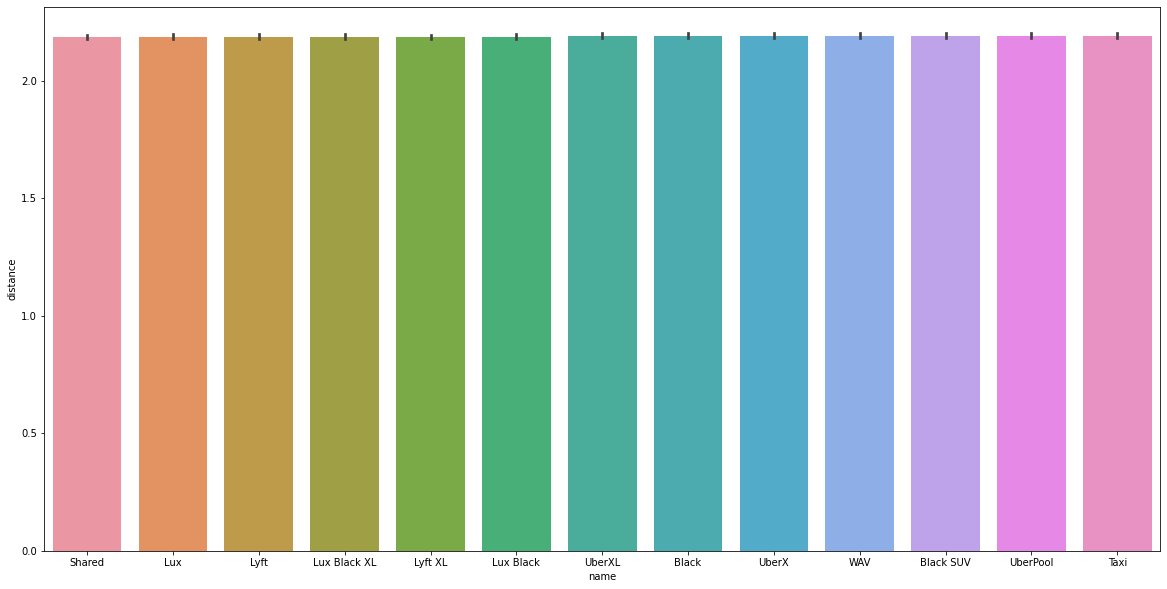

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'name',
            y = 'distance',
            data = df)
 
# Show the plot
plt.show()

In [23]:
df.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,fare_per_mile,date_time
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,11.36,2018-12-16 09:30:07.890000128
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,2018-11-27 02:00:23.676999936
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,15.91,2018-11-28 01:00:22.197999872
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,59.09,2018-11-30 04:53:02.749000192
4,0.44,Lyft,North Station,Haymarket Square,8.9980,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,20.45,2018-11-29 03:49:20.223000064


In [24]:
df.dtypes

distance                   float64
cab_type                    object
destination                 object
source                      object
price                      float64
surge_multiplier           float64
id                          object
product_id                  object
name                        object
fare_per_mile              float64
date_time           datetime64[ns]
dtype: object

In [25]:
df1.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
date_time        0
dtype: int64

In [26]:
df1['rain'] = df1['rain'].fillna(df1['rain'].mean())

In [27]:
df1.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
date_time     0
dtype: int64

In [28]:
#df1['date']= df1['date_time'].dt.date
df1['day'] = df1.date_time.dt.dayofweek
df1['hour'] = df1.date_time.dt.hour
#f['date']= df['date_time'].dt.date
df['day'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour

In [29]:
#merge the datasets to refelect same time for a location
df['merge_date'] = df.source.astype(str) +" - "+ df.date_time.dt.date.astype("str") +" - "+ df.date_time.dt.hour.astype("str")
df1['merge_date'] = df1.location.astype(str) +" - "+ df1.date_time.dt.date.astype("str") +" - "+ df1.date_time.dt.hour.astype("str")

In [30]:
df1.index = df1['merge_date']

In [31]:
df3 = df.join(df1,on=['merge_date'],rsuffix ='_w')

In [32]:
df3.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,fare_per_mile,...,clouds,pressure,rain,time_stamp,humidity,wind,date_time_w,day_w,hour_w,merge_date_w
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,11.36,...,0.29,1022.25,0.057652,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,6.0,9.0,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,...,1.00,1003.17,0.112300,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,1.0,2.0,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,...,0.99,1002.59,0.099700,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,1.0,2.0,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,15.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,59.09,...,0.00,1013.71,0.057652,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,4.0,4.0,Haymarket Square - 2018-11-30 - 4


In [33]:
df3.shape

(1268639, 26)

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
df3.head()

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,fare_per_mile,date_time,day,hour,merge_date,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time_w,day_w,hour_w,merge_date_w
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,11.36,2018-12-16 09:30:07.890000128,6,9,Haymarket Square - 2018-12-16 - 9,38.46,Haymarket Square,0.29,1022.25,0.057652,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,6.0,9.0,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,2018-11-27 02:00:23.676999936,1,2,Haymarket Square - 2018-11-27 - 2,44.31,Haymarket Square,1.00,1003.17,0.112300,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,1.0,2.0,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,25.00,2018-11-27 02:00:23.676999936,1,2,Haymarket Square - 2018-11-27 - 2,43.82,Haymarket Square,0.99,1002.59,0.099700,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,1.0,2.0,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,15.91,2018-11-28 01:00:22.197999872,2,1,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,59.09,2018-11-30 04:53:02.749000192,4,4,Haymarket Square - 2018-11-30 - 4,35.08,Haymarket Square,0.00,1013.71,0.057652,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,4.0,4.0,Haymarket Square - 2018-11-30 - 4


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268639 entries, 0 to 693070
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1268639 non-null  float64       
 1   cab_type          1268639 non-null  object        
 2   destination       1268639 non-null  object        
 3   source            1268639 non-null  object        
 4   price             1268639 non-null  float64       
 5   surge_multiplier  1268639 non-null  float64       
 6   id                1268639 non-null  object        
 7   product_id        1268639 non-null  object        
 8   name              1268639 non-null  object        
 9   fare_per_mile     1268639 non-null  float64       
 10  date_time         1268639 non-null  datetime64[ns]
 11  day               1268639 non-null  int64         
 12  hour              1268639 non-null  int64         
 13  merge_date        1268639 non-null  object 

In [37]:
df3.isnull().sum()

distance               0
cab_type               0
destination            0
source                 0
price                  0
surge_multiplier       0
id                     0
product_id             0
name                   0
fare_per_mile          0
date_time              0
day                    0
hour                   0
merge_date             0
temp                2964
location            2964
clouds              2964
pressure            2964
rain                2964
time_stamp          2964
humidity            2964
wind                2964
date_time_w         2964
day_w               2964
hour_w              2964
merge_date_w        2964
dtype: int64

In [38]:
# Get unique values in each column
for col in df3.columns:
    print(f"Unique values in {col}: {df3[col].unique()}")

Unique values in distance: [0.44 1.08 1.11 0.72 2.48 3.24 2.94 1.76 0.71 1.23 1.16 2.67 3.39 2.82
 2.49 3.07 1.57 3.2  3.61 3.05 1.75 2.36 2.32 1.02 1.17 4.43 1.4  1.01
 2.84 1.3  1.81 2.44 3.04 2.59 3.25 2.66 3.26 2.39 3.28 2.81 3.18 2.63
 3.14 1.79 2.16 1.39 1.97 2.92 2.14 0.91 2.58 3.23 3.02 0.64 2.38 0.8
 2.07 2.61 3.45 1.35 2.8  1.03 3.35 2.93 1.07 3.17 1.2  7.46 1.58 1.71
 1.21 1.61 3.3  4.39 0.55 4.42 1.45 0.61 0.49 0.39 3.8  2.46 2.34 2.56
 4.23 1.56 2.35 3.37 1.52 2.05 2.15 1.26 1.5  4.76 1.34 3.41 1.33 2.19
 1.04 1.22 1.09 0.54 2.09 3.68 1.66 1.92 2.33 2.25 2.88 3.42 0.63 1.41
 4.51 0.56 3.47 4.09 2.73 3.19 0.65 2.78 1.   2.62 2.77 2.47 1.43 3.1
 1.89 2.3  4.31 1.06 1.64 1.86 4.1  1.74 2.31 2.83 3.48 1.78 4.44 0.52
 0.92 3.08 0.43 5.33 4.5  0.46 2.91 1.14 3.22 1.69 0.81 1.36 1.73 4.61
 2.68 2.03 4.73 2.27 1.25 3.43 2.72 3.15 0.59 0.53 3.44 2.17 2.96 0.76
 3.79 2.43 2.5  4.55 2.12 2.   5.32 0.42 1.47 2.86 3.12 2.85 1.49 4.35
 0.3  1.59 1.46 3.06 5.56 2.37 2.41 1.37 3.16 0.73 3

Unique values in merge_date_w: ['Haymarket Square - 2018-12-16 - 9' 'Haymarket Square - 2018-11-27 - 2'
 nan ... 'Northeastern University - 2018-12-10 - 1'
 'North End - 2018-11-26 - 3' 'Fenway - 2018-11-28 - 8']


In [39]:
df3['temp'] = df3['temp'].fillna(df3['temp'].mean())
df3['location'] = df3['location'].fillna(df3['location'].mode())
df3['clouds'] = df3['clouds'].fillna(df3['clouds'].mean())
df3['pressure'] = df3['pressure'].fillna(df3['pressure'].mean())
df3['rain'] = df3['rain'].fillna(df3['rain'].mean())
df3['time_stamp'] = df3['time_stamp'].fillna(df3['time_stamp'].mode())
df3['humidity'] = df3['humidity'].fillna(df3['humidity'].mean())
df3['wind'] = df3['wind'].fillna(df3['wind'].mean())
df3['date_time_w'] = df3['date_time_w'].fillna(df3['date_time_w'].mode())
df3['day_w'] = df3['day_w'].fillna(df3['day_w'].mode())
df3['hour_w'] = df3['hour_w'].fillna(df3['hour_w'].mode())
#df3['merge_date_w '] = df3['merge_date_w '].fillna(df3['merge_date_w '].mode())

In [40]:
df3.isnull().sum()

distance               0
cab_type               0
destination            0
source                 0
price                  0
surge_multiplier       0
id                     0
product_id             0
name                   0
fare_per_mile          0
date_time              0
day                    0
hour                   0
merge_date             0
temp                   0
location            2964
clouds                 0
pressure               0
rain                   0
time_stamp          2963
humidity               0
wind                   0
date_time_w         2963
day_w               2964
hour_w              2964
merge_date_w        2964
dtype: int64

In [41]:
df3 = df3.dropna()

In [42]:
df3.isnull().sum()

distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
fare_per_mile       0
date_time           0
day                 0
hour                0
merge_date          0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp          0
humidity            0
wind                0
date_time_w         0
day_w               0
hour_w              0
merge_date_w        0
dtype: int64

In [43]:
df3.shape

(1265675, 26)

In [44]:
df3.duplicated().sum()

0

In [45]:
df3 = df3.drop_duplicates()

In [46]:
df3.describe()

,distance,price,surge_multiplier,fare_per_mile,day,hour,temp,clouds,pressure,rain,time_stamp,humidity,wind,day_w,hour_w
count,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06
mean,2.189590e+00,1.630132e+01,1.013879e+00,9.663587e+00,2.387931e+00,1.055143e+01,3.925680e+01,6.803707e-01,1.004985e+03,5.938407e-02,1.543757e+09,7.538507e-01,7.693640e+00,2.387931e+00,1.055143e+01
std,1.139829e+00,8.984883e+00,9.134762e-02,1.444035e+01,1.744490e+00,7.391508e+00,5.471145e+00,2.996939e-01,1.269359e+01,4.458292e-02,6.106462e+05,1.195526e-01,3.448785e+00,1.744490e+00,7.391508e+00
min,2.000000e-02,2.488500e+00,1.000000e+00,5.600000e-01,0.000000e+00,0.000000e+00,1.962000e+01,0.000000e+00,9.882500e+02,2.000000e-04,1.543204e+09,4.500000e-01,2.900000e-01,0.000000e+00,0.000000e+00
25%,1.280000e+00,9.495600e+00,1.000000e+00,4.670000e+00,1.000000e+00,4.000000e+00,3.726000e+01,4.500000e-01,9.940800e+02,5.765235e-02,1.543398e+09,6.600000e-01,4.960000e+00,1.000000e+00,4.000000e+00
50%,2.160000e+00,1.350240e+01,1.000000e+00,7.410000e+00,2.000000e+00,1.000000e+01,3.961000e+01,7.600000e-01,1.000780e+03,5.765235e-02,1.543455e+09,7.200000e-01,8.800000e+00,2.000000e+00,1.000000e+01
75%,2.930000e+00,2.249100e+01,1.000000e+00,1.146000e+01,3.000000e+00,1.700000e+01,4.270000e+01,9.700000e-01,1.014530e+03,5.765235e-02,1.543813e+09,8.700000e-01,1.023000e+01,3.000000e+00,1.700000e+01
max,7.860000e+00,9.750430e+01,3.000000e+00,1.375000e+03,6.000000e+00,2.300000e+01,5.541000e+01,1.000000e+00,1.035120e+03,7.807000e-01,1.545159e+09,9.900000e-01,1.818000e+01,6.000000e+00,2.300000e+01


In [47]:
def hist_plot(col_name):
    plt.hist(x=df3[col_name], bins=15,color='r')
    title = "plot of {}".format(col_name)
    plt.title(title)
    plt.show()

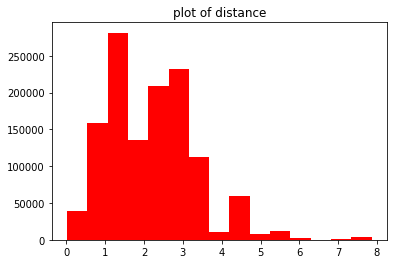

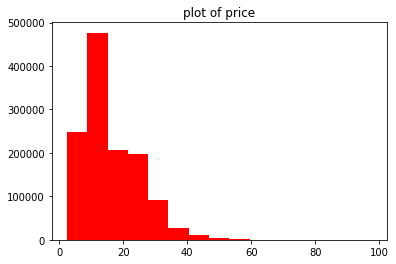

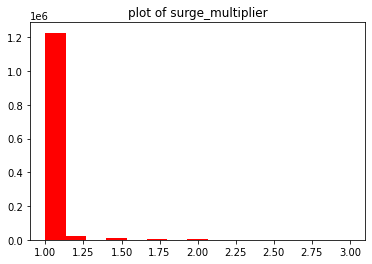

In [48]:
hist_plot("distance")
hist_plot("price")
hist_plot("surge_multiplier")

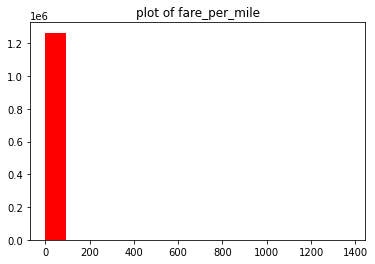

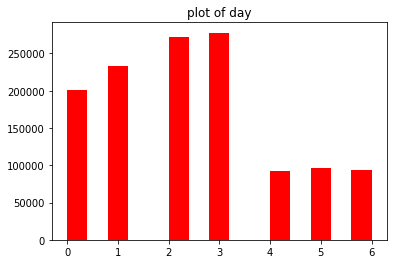

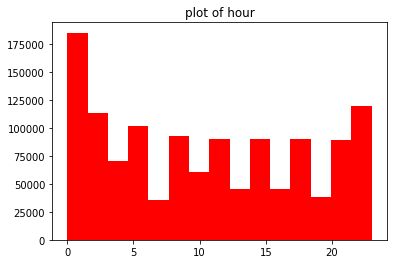

In [49]:
hist_plot("fare_per_mile")
hist_plot("day")
hist_plot("hour")

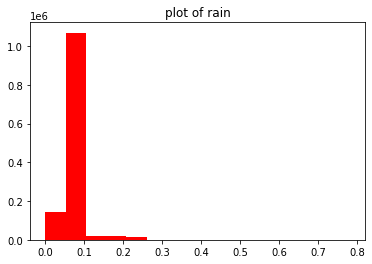

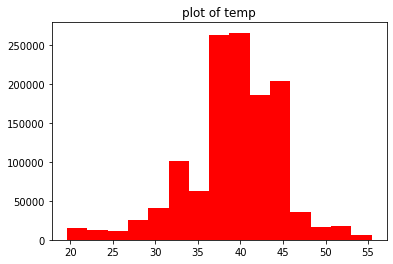

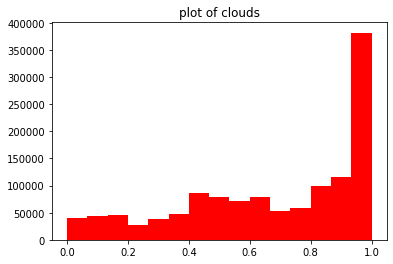

In [50]:
hist_plot("rain")
hist_plot("temp")
hist_plot("clouds")

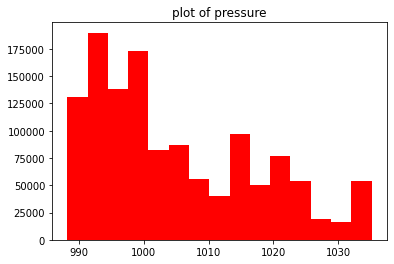

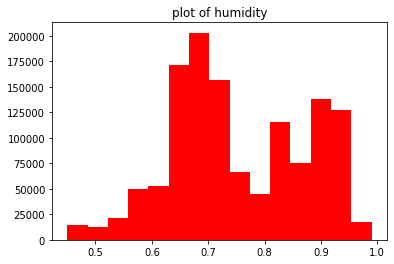

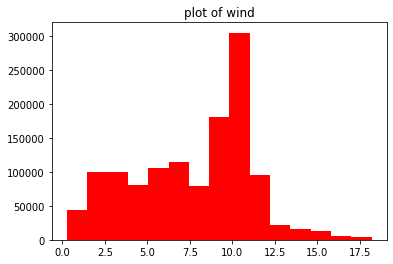

In [51]:
hist_plot("pressure")
hist_plot("humidity")
hist_plot("wind")

## Log normal Transformation 

In [52]:
df3["price"] = np.log(df3["price"])

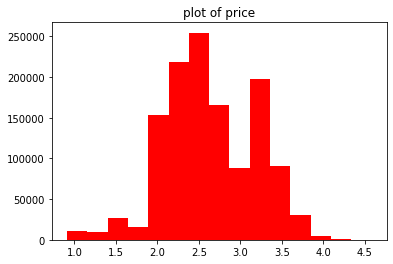

In [53]:
hist_plot("price")

In [54]:
df3["surge_multiplier"] = np.log(df3["surge_multiplier"])

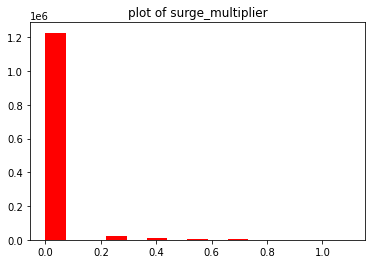

In [55]:
hist_plot("surge_multiplier")

In [56]:
 df3["fare_per_mile"] = np.log(df3["fare_per_mile"])

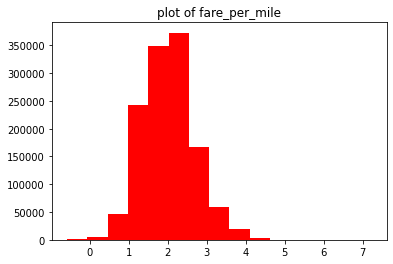

In [57]:
hist_plot("fare_per_mile")

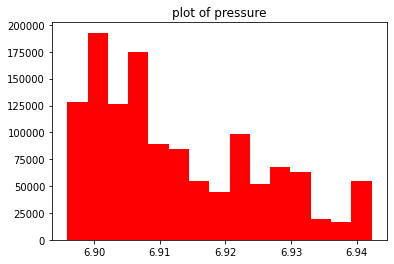

In [58]:
df3["pressure"] = np.log(df3["pressure"])
hist_plot("pressure")

In [59]:
df3.describe()

,distance,price,surge_multiplier,fare_per_mile,day,hour,temp,clouds,pressure,rain,time_stamp,humidity,wind,day_w,hour_w
count,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06,1.265675e+06
mean,2.189590e+00,2.645762e+00,1.096642e-02,2.014583e+00,2.387931e+00,1.055143e+01,3.925680e+01,6.803707e-01,6.912649e+00,5.938407e-02,1.543757e+09,7.538507e-01,7.693640e+00,2.387931e+00,1.055143e+01
std,1.139829e+00,5.462233e-01,6.870865e-02,6.663387e-01,1.744490e+00,7.391508e+00,5.471145e+00,2.996939e-01,1.257742e-02,4.458292e-02,6.106462e+05,1.195526e-01,3.448785e+00,1.744490e+00,7.391508e+00
min,2.000000e-02,9.116801e-01,0.000000e+00,-5.798185e-01,0.000000e+00,0.000000e+00,1.962000e+01,0.000000e+00,6.895936e+00,2.000000e-04,1.543204e+09,4.500000e-01,2.900000e-01,0.000000e+00,0.000000e+00
25%,1.280000e+00,2.250829e+00,0.000000e+00,1.541159e+00,1.000000e+00,4.000000e+00,3.726000e+01,4.500000e-01,6.901818e+00,5.765235e-02,1.543398e+09,6.600000e-01,4.960000e+00,1.000000e+00,4.000000e+00
50%,2.160000e+00,2.602867e+00,0.000000e+00,2.002830e+00,2.000000e+00,1.000000e+01,3.961000e+01,7.600000e-01,6.908535e+00,5.765235e-02,1.543455e+09,7.200000e-01,8.800000e+00,2.000000e+00,1.000000e+01
75%,2.930000e+00,3.113115e+00,0.000000e+00,2.438863e+00,3.000000e+00,1.700000e+01,4.270000e+01,9.700000e-01,6.922181e+00,5.765235e-02,1.543813e+09,8.700000e-01,1.023000e+01,3.000000e+00,1.700000e+01
max,7.860000e+00,4.579896e+00,1.098612e+00,7.226209e+00,6.000000e+00,2.300000e+01,5.541000e+01,1.000000e+00,6.942273e+00,7.807000e-01,1.545159e+09,9.900000e-01,1.818000e+01,6.000000e+00,2.300000e+01


## Outlier Detaection and Removal

In [60]:
def box_plot(col_name):
    sns.boxplot(x=df3[col_name],color="b")
    plt.show()

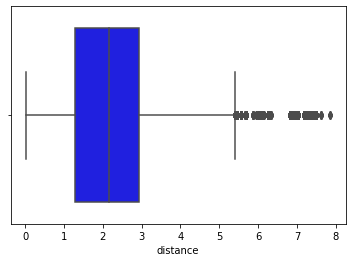

In [61]:
box_plot("distance")

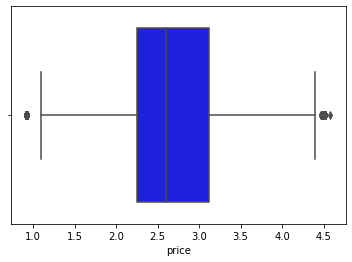

In [62]:
box_plot("price")

## Checking Coreelation 

In [63]:
# Here Surge Price is a target Column

In [64]:
df3.corr()

,distance,price,surge_multiplier,fare_per_mile,day,hour,temp,clouds,pressure,rain,time_stamp,humidity,wind,day_w,hour_w
distance,1.000000,0.323969,0.024825,-0.560342,0.002884,-0.001177,-0.002057,-0.000463,0.001669,-0.001116,0.002083,-0.003641,-0.001543,0.002884,-0.001177
price,0.323969,1.000000,0.185297,0.541775,0.001579,0.000282,0.000278,0.001438,0.000704,-0.000866,0.000619,-0.001511,0.000060,0.001579,0.000282
surge_multiplier,0.024825,0.185297,1.000000,0.123795,-0.000437,0.000321,-0.001866,-0.000623,-0.002004,-0.002951,0.000566,-0.003200,-0.000897,-0.000437,0.000321
fare_per_mile,-0.560342,0.541775,0.123795,1.000000,-0.001135,-0.001404,0.004171,0.000036,-0.000958,0.001308,-0.001541,0.000476,0.001430,-0.001135,-0.001404
day,0.002884,0.001579,-0.000437,-0.001135,1.000000,-0.046990,-0.172879,-0.244094,0.465153,-0.092215,0.306580,-0.227793,-0.241449,1.000000,-0.046990
hour,-0.001177,0.000282,0.000321,-0.001404,-0.046990,1.000000,0.191991,0.093998,-0.043177,-0.175792,0.056611,-0.246362,-0.043372,-0.046990,1.000000
temp,-0.002057,0.000278,-0.001866,0.004171,-0.172879,0.191991,1.000000,0.520904,-0.242697,0.067807,-0.263643,0.356918,0.156452,-0.172879,0.191991
clouds,-0.000463,0.001438,-0.000623,0.000036,-0.244094,0.093998,0.520904,1.000000,-0.076816,0.071480,-0.082544,0.441326,0.116438,-0.244094,0.093998
pressure,0.001669,0.000704,-0.002004,-0.000958,0.465153,-0.043177,-0.242697,-0.076816,1.000000,0.018423,0.593462,-0.040220,-0.555862,0.465153,-0.043177
rain,-0.001116,-0.000866,-0.002951,0.001308,-0.092215,-0.175792,0.067807,0.071480,0.018423,1.000000,-0.087852,0.103566,0.127031,-0.092215,-0.175792


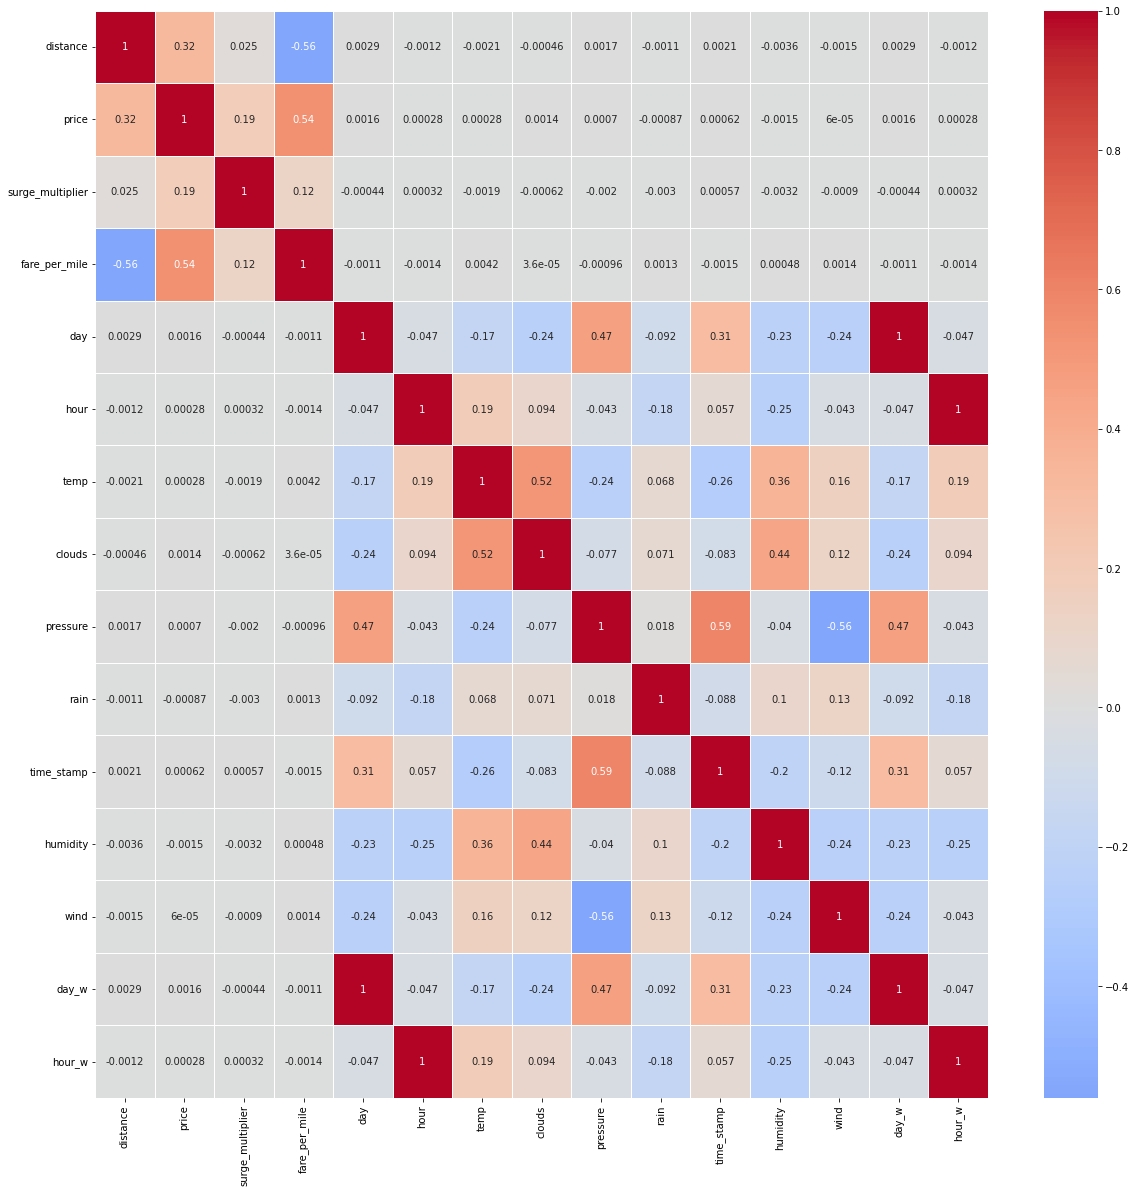

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265675 entries, 0 to 693070
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1265675 non-null  float64       
 1   cab_type          1265675 non-null  object        
 2   destination       1265675 non-null  object        
 3   source            1265675 non-null  object        
 4   price             1265675 non-null  float64       
 5   surge_multiplier  1265675 non-null  float64       
 6   id                1265675 non-null  object        
 7   product_id        1265675 non-null  object        
 8   name              1265675 non-null  object        
 9   fare_per_mile     1265675 non-null  float64       
 10  date_time         1265675 non-null  datetime64[ns]
 11  day               1265675 non-null  int64         
 12  hour              1265675 non-null  int64         
 13  merge_date        1265675 non-null  object 

In [67]:
X = df3[df3.product_id=='lyft_line'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [68]:
X.count()

day         93762
distance    93762
hour        93762
temp        93762
clouds      93762
pressure    93762
humidity    93762
wind        93762
rain        93762
dtype: int64

# Prediction for Price

In [69]:
y = df3[df3.product_id=='lyft_line']['price'] 

In [70]:
y.count()

93762

In [71]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [72]:
X.head()

,day,distance,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,9,38.46,0.29,6.929761,0.76,7.68,0.057652
1,0,1.08,6,44.85,0.89,6.908455,0.95,1.53,0.057652
2,4,0.72,2,36.31,0.00,6.920049,0.68,6.85,0.057652
3,1,3.24,3,44.18,0.99,6.909254,0.89,12.40,0.242000
4,1,3.24,3,44.25,1.00,6.908565,0.90,13.70,0.161700


In [73]:
features = pd.get_dummies(X)

In [74]:
features.columns

Index(['day', 'distance', 'hour', 'temp', 'clouds', 'pressure', 'humidity',
       'wind', 'rain'],
      dtype='object')

In [75]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

## Model Building

In [76]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [77]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (70321, 9)
Training Labels Shape: (70321,)
Testing Features Shape: (23441, 9)
Testing Labels Shape: (23441,)


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [79]:
reg = LinearRegression()

In [80]:
reg.fit(train_features,train_labels)

LinearRegression()

In [81]:
y_predict = reg.predict(test_features)

In [82]:
from sklearn.metrics import mean_squared_error
errors = abs(y_predict - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.22 degrees.


In [83]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.69 %.


# prediction for surge_multiplier


In [125]:
merged_df_surge = df3[df3.surge_multiplier < 2]
X = merged_df_surge[['day','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [126]:
X.count()

day         1265675
hour        1265675
temp        1265675
clouds      1265675
pressure    1265675
humidity    1265675
wind        1265675
rain        1265675
dtype: int64

In [127]:
features = pd.get_dummies(X)

In [129]:
y = merged_df_surge['surge_multiplier']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


le.fit([0.0, 0.22314355131420976, 0.4054651081081644, 0.5596157879354227, 0.6931471805599453, 0.9162907318741551, 1.0986122886681098,1,1.25,1.5,1.75,2.,2.25,2.5])
y = le.transform(y) 

In [130]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(features)

In [131]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets


In [145]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_features,train_labels)


LinearRegression()

In [167]:
#Calculate intercept and coefficient
print(model.intercept_)
print(model.coef_)
pred=model.predict(test_features)
predictions = pred.reshape(-1,1)
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(test_labels,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(test_labels,predictions)))
print('MAE: ', mean_absolute_error(test_labels, predictions))
      

[1.10315169]
[[-1.28459569e-04 -4.58442679e-05 -1.07316013e-04  3.71717722e-03
  -1.48756149e-01 -1.68954140e-02 -4.12437027e-04 -1.81799931e-02]]
MSE :  0.130722830503547
RMSE :  0.36155612358739964
MAE:  0.1070930233807117


In [155]:
#Accuracy = 1.96*RMSE
Accuracy = 1.96*0.36155612358739964
print(Accuracy)

0.7086500022313033


In [132]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_features, train_labels = sm.fit_resample(train_features, train_labels)

## Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor() 


In [158]:
random_forest.fit(train_features, train_labels)
y_pred = random_forest.predict(test_features) 


C:\Users\Asus\AppData\Local\Temp\ipykernel_7812\722011110.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_features, train_labels)


In [165]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(test_labels, y_pred))
print('MSE: ', mean_squared_error(test_labels, y_pred)) 
print('RMSE : ', np.sqrt(mean_squared_error(test_labels,y_pred)))

MAE:  0.10510675728307341
MSE:  0.12946587505559376
RMSE :  0.35981366713285606


In [166]:
#Accuracy = 1.96*RMSE
Accuracy = 1.96*0.35981366713285606
print(Accuracy)

0.7052347875803979


## DecisionTreeRegressor 

In [173]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 

In [174]:
regressor.fit(train_features, train_labels)

DecisionTreeRegressor(random_state=0)

In [175]:
pred = regressor.predict(test_features) 

In [176]:
print('MAE: ', mean_absolute_error(test_labels, pred))
print('MSE: ', mean_squared_error(test_labels, pred)) 
print('RMSE : ', np.sqrt(mean_squared_error(test_labels,pred)))

MAE:  0.10509422000071099
MSE:  0.1294632710605452
RMSE :  0.35981004858195
